In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#imporing liabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f=pd.read_csv('USA_Housing.csv')
f.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
#checking for null values
f.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
f.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

### Handling the categorical data

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
f["Address"]=le.fit_transform(f["Address"])

In [9]:
f.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  Address  
0                          4.09     23086.800503  1.059034e+06      962  
1                          3.09     40173.072174  1.505891e+06      863  
2                          5.13     36882.159400  1.058988e+06     4069  
3                          3.26     34310.242831  1.260617e+06     4794  
4                          4.23     26354.109472  6.309435e+05     4736

In [10]:
f.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
for cols in f.columns[:]:
    Q1=f[cols].quantile(q=0.25)
    Q3=f[cols].quantile(q=0.75)
    iqr=Q3-Q1
    
    low=Q1-1.5*(iqr)
    high=Q3+1.5*(iqr)
    f.loc[(f[cols]<low) | (f[cols]>high),cols]=f[cols].median()


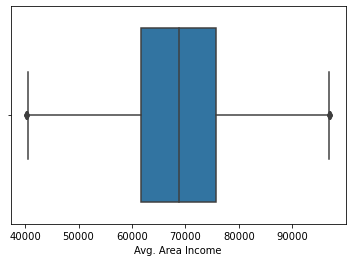

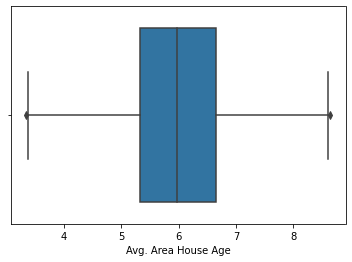

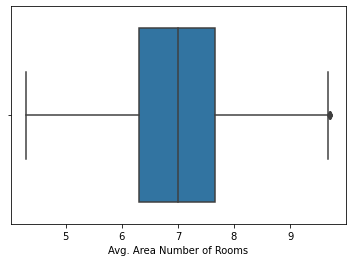

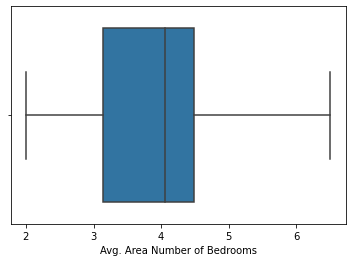

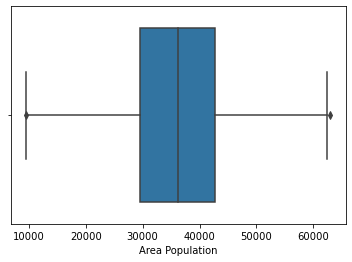

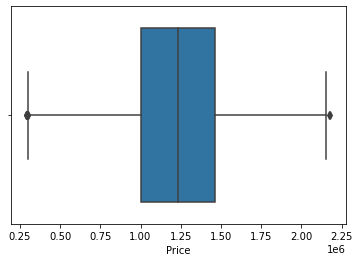

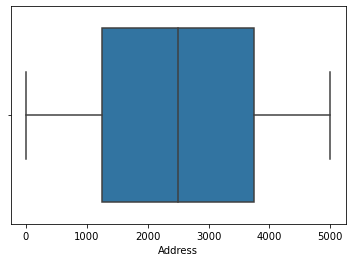

In [12]:
for col in f:
    sns.boxplot(f[col]);
    plt.show()

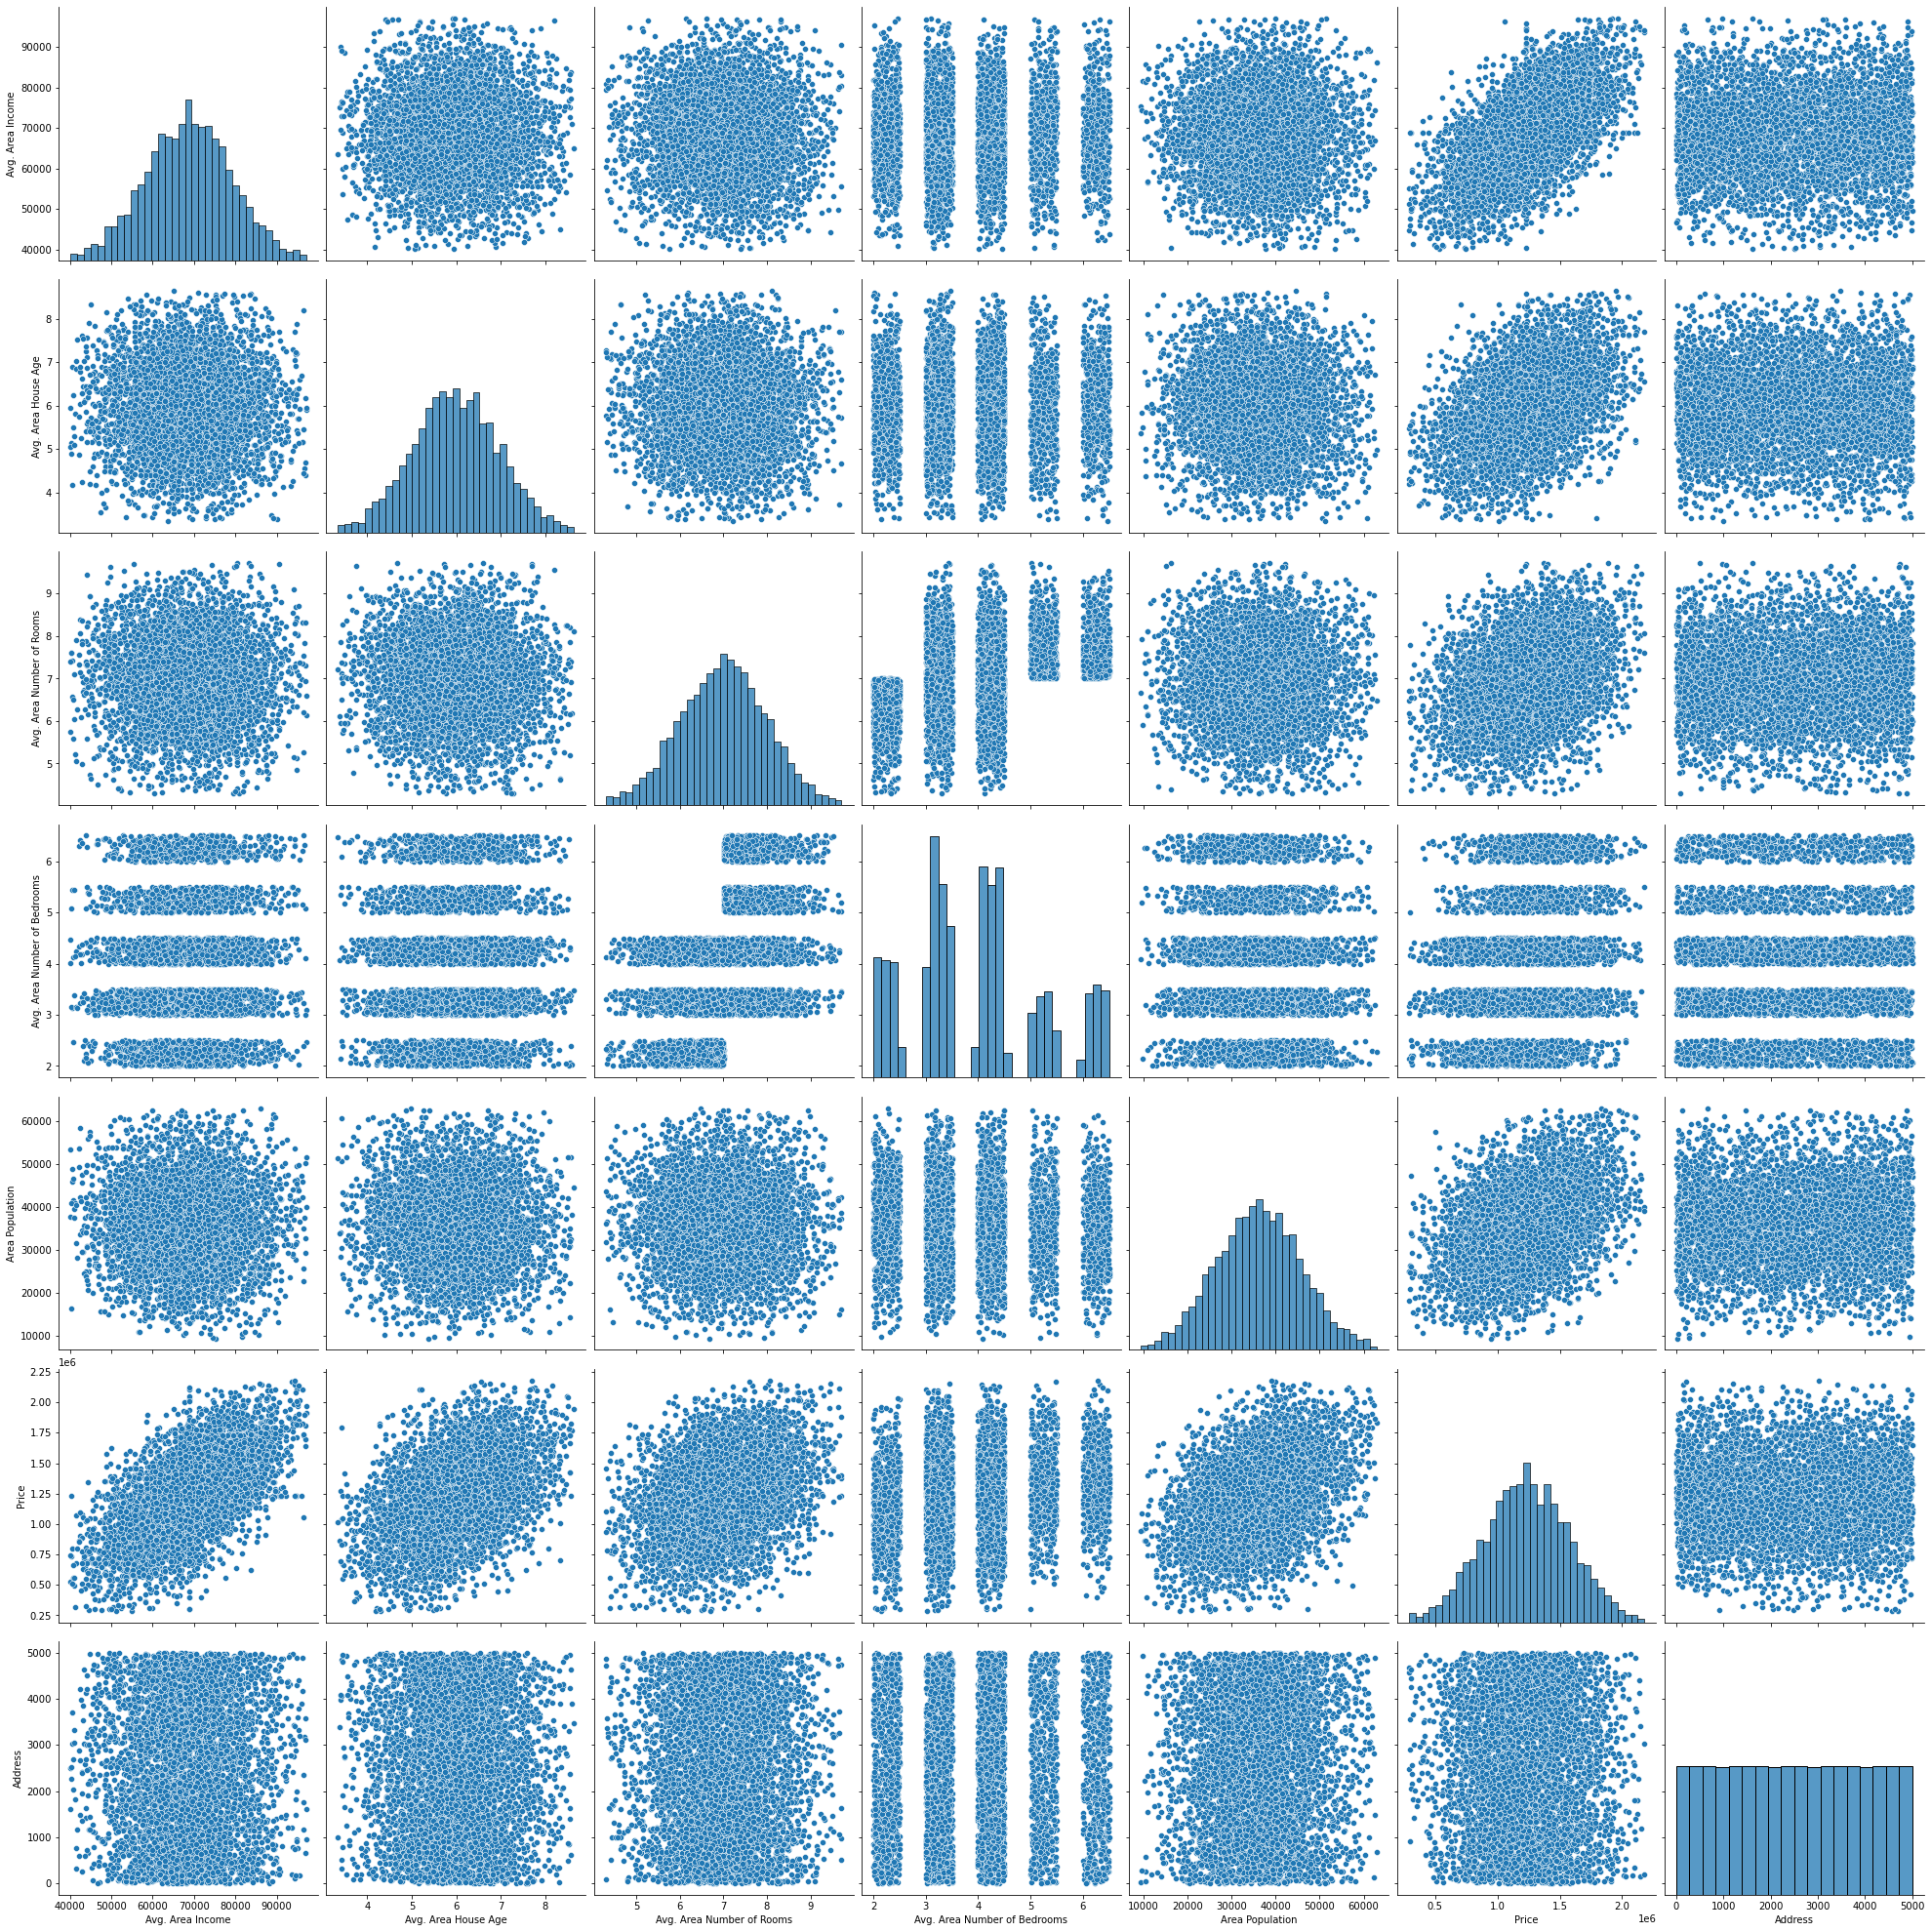

In [13]:
sns.pairplot(f,height=4, aspect=1,kind="scatter");
plt.show();

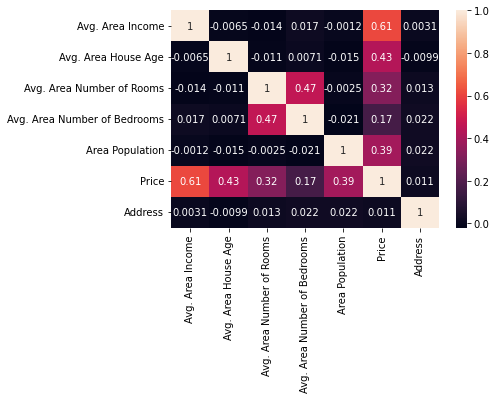

In [14]:
sns.heatmap(f.corr(),annot=True);

In [15]:
# Visualise the relationship between the features and the response.

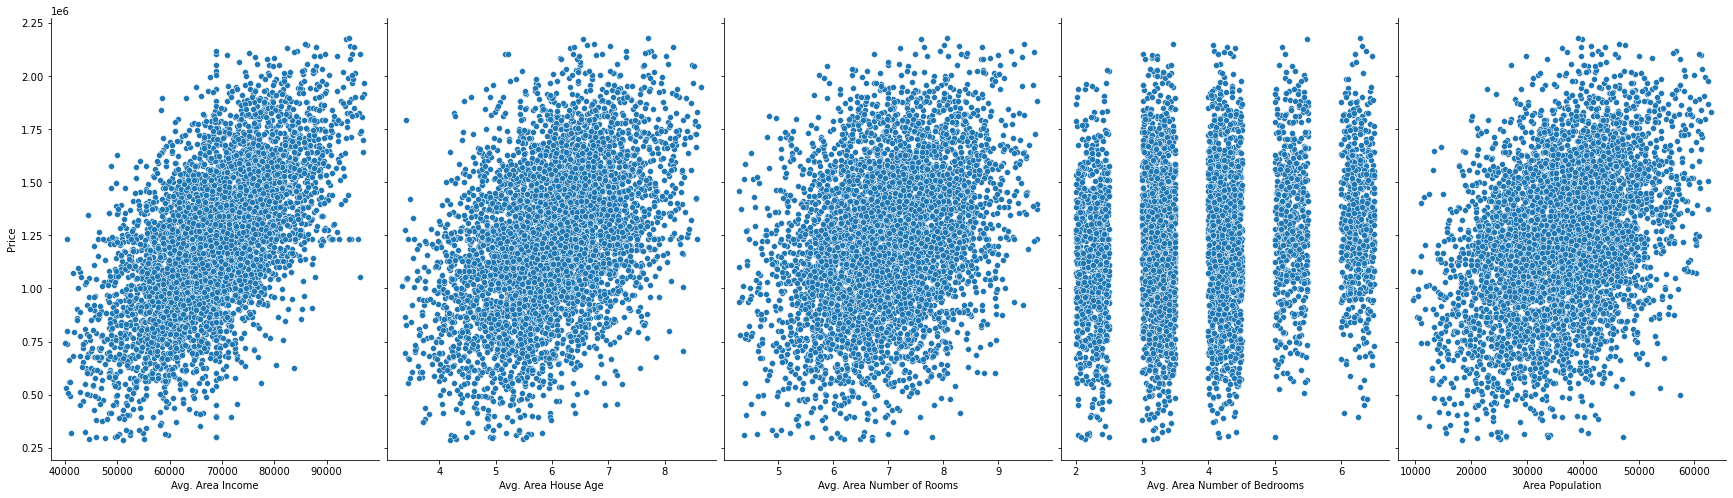

In [16]:
sns.pairplot(f, x_vars=['Avg. Area Income','Avg. Area House Age',
'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'],
y_vars='Price',height=7, aspect=0.7, kind='scatter');

### Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [18]:
X=f['Avg. Area Income'].values.reshape(-1,1)
y=f["Price"].values

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)

In [22]:
r2_score(y_train,y_train_pred)

0.3656095857454893

In [23]:
r2_score(y_test,y_test_pred)

0.3868795251033309

**By simple linear regression we are not getting the good score, so our module is underfitting.**

### Multiple Regression

In [24]:
X=f.drop('Price',axis=1)
y=f["Price"]

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)

In [29]:
r2_score(y_train,y_train_pred)

0.8242542191567196

In [30]:
r2_score(y_test,y_test_pred)

0.856116378012786

**Multiple Linear Regression gives the 0.8561 r2 score**

In [31]:
#KFold for Multiple linear regression
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lr,X_train,y_train,cv=fold)
score_test=cross_val_score(lr,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.83783775 0.80864445 0.81893219 0.83927237 0.81133865]
[0.84283755 0.83002893 0.91278357 0.79591565 0.87448696]

acc_score_train : 0.8232050823702096
acc_score_test : 0.8512105322640539


**Multiple Linear Regression after cv gives the 0.8512 r2 score**

In [32]:
#Lasso Regulization
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.1, max_iter=100, tol=0.1)
lso.fit(X_train,y_train)
print("lasso_train_score:",lso.score(X_train,y_train))
print("lasso_test_score:",lso.score(X_test,y_test))

lasso_train_score: 0.8242391943715228
lasso_test_score: 0.8563326984732491


In [33]:
# Ridge Regulization
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=.1, max_iter=100, tol=0.1)
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.8242542189275162
Ridge_test_score: 0.8561154836761112


In [34]:
#ElasticNet Regularization
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=.1, max_iter=100, tol=0.1)
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_train_score:",enet.score(X_test,y_test))

ENet_train_score: 0.823573676608808
ENet_train_score: 0.8540704085185455


In [35]:
#KFold for lasso
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#lr = LinearRegression()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lso,X_train,y_train,cv=fold)
score_test=cross_val_score(lso,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.8378393  0.80872684 0.81885098 0.83910234 0.81142987]
[0.84249711 0.82992648 0.91334041 0.79596132 0.87437239]

acc_score_train : 0.8231898683241603
acc_score_test : 0.8512195403574218


**Lasso Regularization after cv gives the 0.8512 r2 score**

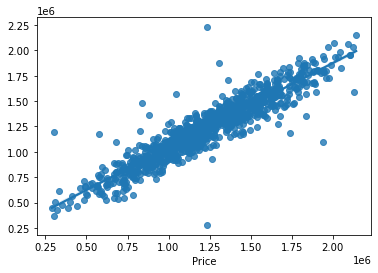

In [36]:
sns.regplot(y_test,y_test_pred);

### After observing this plot we can see there is close prediction So we can say our module is good.

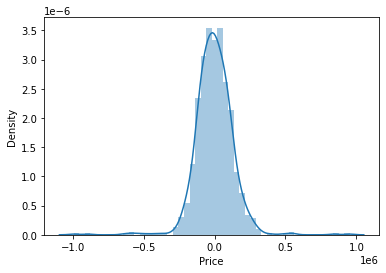

In [37]:
residual=y_test-y_test_pred
sns.distplot(residual);

In [42]:
result=pd.DataFrame({'Actual':y_test,"Predicted":y_test_pred})
result.sample(5)

Actual     Predicted
2329  1.534295e+06  1.443395e+06
2394  1.555806e+06  1.444469e+06
2926  7.473963e+05  8.279799e+05
4581  1.391159e+06  1.455302e+06
3188  7.278665e+05  6.536442e+05